In [ ]:
%pip install requests

In [ ]:
%pip install IPython

In [2]:
import requests
import os
from IPython.display import Image, display  # For notebook image preview
from config import API_KEY 

In [3]:
def get_streetview_image(lat=None, lon=None, address=None, heading=0, pitch=0, fov=120, size="600x400", save_folder="images"):
    """
    Downloads and saves a Google Street View image using either coordinates or address
    """
    # Validate inputs
    if not any([all([lat, lon]), address]):
        raise ValueError("Must provide either both coordinates OR an address")

    # Gather geocoordinates using Google's Geocoding API
    # Passes either both coordinates or an address to the API
    if address:
        geocode_url = "https://maps.googleapis.com/maps/api/geocode/json"
        params = {"address": address, "key": API_KEY}
        
        try:
            response = requests.get(geocode_url, params=params)
            if response.status_code != 200:
                print(f"Geocoding failed: {response.status_code}")
                return None
                
            data = response.json()
            if not data.get("results"):
                print("No results found for this address")
                return None
                
            best_result = data["results"][0]
            lat = best_result["geometry"]["location"]["lat"]
            lon = best_result["geometry"]["location"]["lng"]
            print(f"Geocoded '{address}' to {lat},{lon}")
            
        except Exception as e:
            print(f"Geocoding error: {str(e)}")
            return None


    # Download street view image using Google's StreetView Static API
    os.makedirs(save_folder, exist_ok=True)
    base_url = "https://maps.googleapis.com/maps/api/streetview"
    params = {
        "size": size,
        "location": f"{lat},{lon}",
        "heading": heading,
        "pitch": pitch,
        "fov": fov,
        "key": API_KEY
    }
    
    try:
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            filename = f"streetview_{address or f'{lat}_{lon}'}_heading{heading}.jpg"
            filepath = os.path.join(save_folder, filename)
            with open(filepath, "wb") as f:
                f.write(response.content)
            print(f"Saved to {filepath}")
            return filepath
        else:
            print(f"Street View Error: {response.status_code}")
            return None
    except Exception as e:
        print(f"Download error: {str(e)}")
        return None

Geocoded 'R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180' to -23.6431313,-46.5289025
Saved to images\streetview_R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180_heading0.jpg


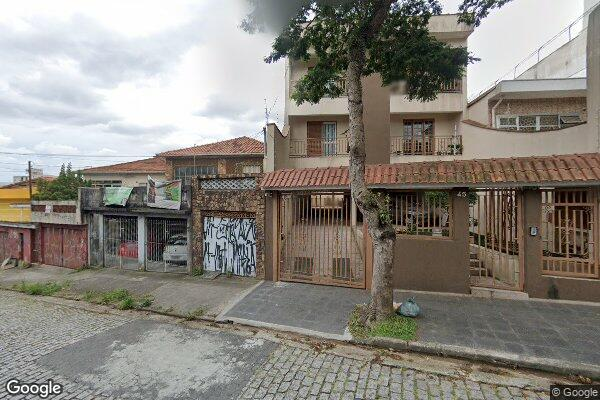

Geocoded 'R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180' to -23.6431313,-46.5289025
Saved to images\streetview_R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180_heading90.jpg


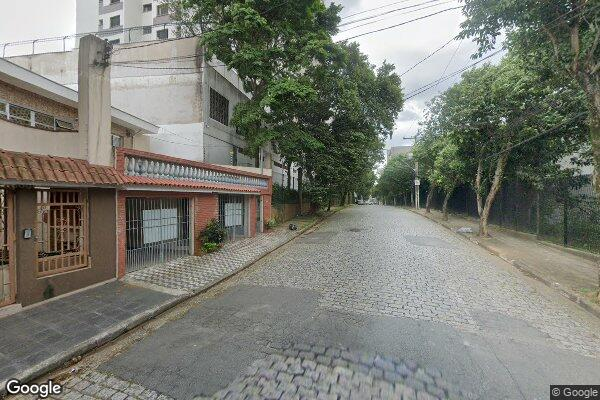

Geocoded 'R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180' to -23.6431313,-46.5289025
Saved to images\streetview_R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180_heading180.jpg


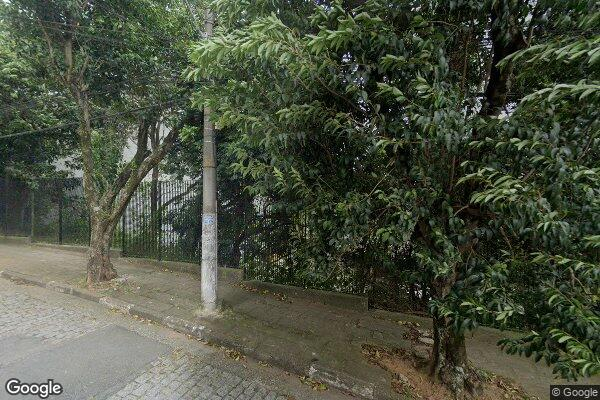

Geocoded 'R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180' to -23.6431313,-46.5289025
Saved to images\streetview_R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180_heading270.jpg


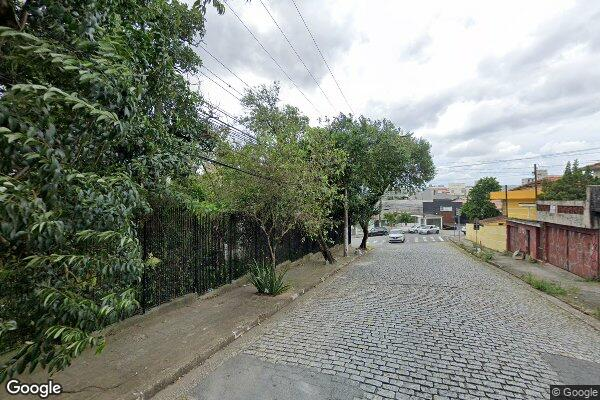

In [ ]:
# Iterates over desired angles for each image capture
for angle in [0, 90, 180, 270]:
    image_path = get_streetview_image(
        address="R. Abolição, 53 - Vila Sao Pedro, Santo André - SP, 09210-180",
        heading=angle,
        fov=100
    )
    # Display in below notebook 
    if image_path:
        display(Image(filename=image_path))

Geocoded 'R. Arcturus, 3 - Jardim Antares, São Bernardo do Campo - SP, 09606-070' to -23.6754996,-46.5623904
Saved to images\streetview_R. Arcturus, 3 - Jardim Antares, São Bernardo do Campo - SP, 09606-070_heading0.jpg


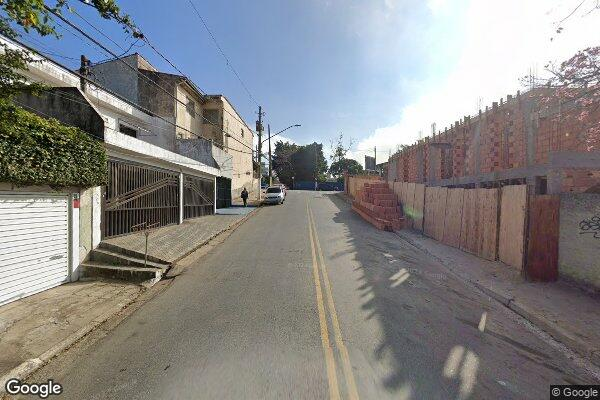

Geocoded 'R. Arcturus, 3 - Jardim Antares, São Bernardo do Campo - SP, 09606-070' to -23.6754996,-46.5623904


KeyboardInterrupt: 

In [5]:
# Iterates over desired angles for each image capture
for angle in [0, 90, 180, 270]:
    image_path = get_streetview_image(
        address="R. Arcturus, 3 - Jardim Antares, São Bernardo do Campo - SP, 09606-070",
        heading=angle,
        fov=100
    )
    # Display in below notebook 
    if image_path:
        display(Image(filename=image_path))

Saved to images\streetview_-23.643262_-46.528895_heading20.jpg


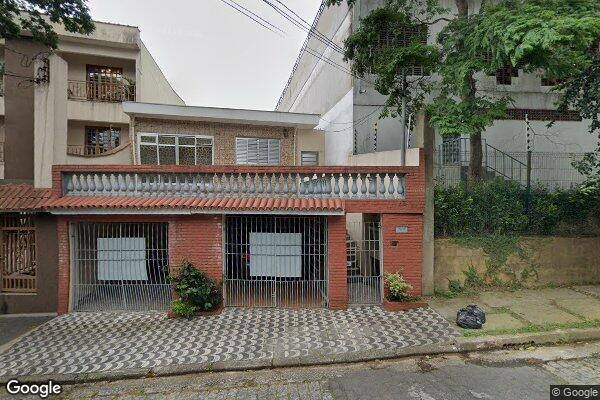

In [6]:
# Iterates over desired angles for each image capture
for angle in [20]:
    image_path = get_streetview_image(
        lat=-23.643262,
        lon=-46.528895,
        heading=angle,
        fov=90
    )
    # Display in below notebook 
    if image_path:
        display(Image(filename=image_path))

Saved to images\streetview_-23.6746568_-46.5605881_heading156.jpg


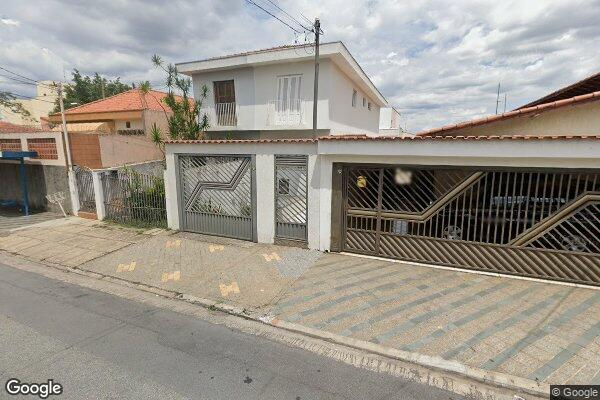

In [33]:
# Iterates over desired angles for each image capture
for angle in [156]:
    image_path = get_streetview_image(
        lat=-23.6746568,
        lon=-46.5605881,
        heading=angle,
        fov=90,
        pitch=-10
    )
    # Display in below notebook 
    if image_path:
        display(Image(filename=image_path))

Saved to images\streetview_-23.674656_-46.5604839_heading210.jpg


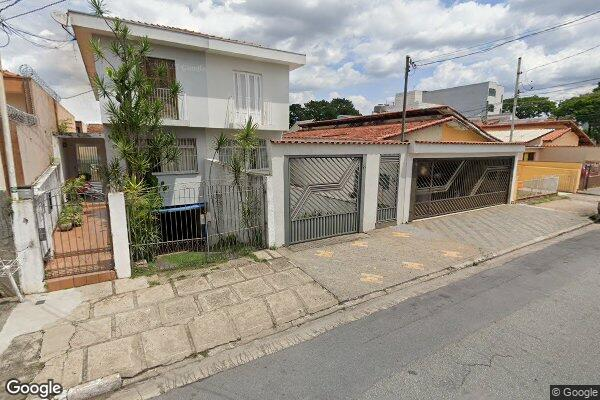

In [32]:
# Iterates over desired angles for each image capture
for angle in [210]:
    image_path = get_streetview_image(
        lat=-23.674656,
        lon=-46.5604839,
        heading=angle,
        fov=90,
        pitch=-10
    )
    # Display in below notebook 
    if image_path:
        display(Image(filename=image_path))